# Import libraries, assign path, import data set

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\Johnn\Documents\Instacart Basket Analysis'

In [3]:
ords_prods_cust_merged_4 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_3.pkl'))

# Create Visuals

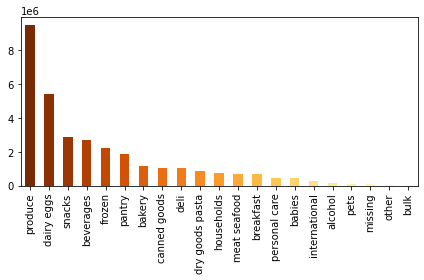

In [4]:
bar_top_selling_departments = ords_prods_cust_merged_4['department_name'].value_counts().plot.bar(color = sns.color_palette('YlOrBr_r', 21))
plt.tight_layout()

In [5]:
bar_top_selling_departments.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_selling_departments.png'))

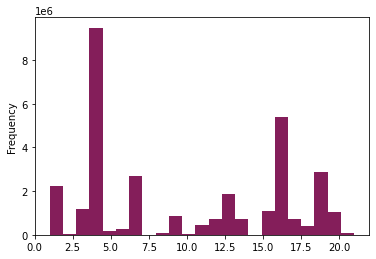

In [6]:
hist = ords_prods_cust_merged_4['department_id'].plot.hist(bins = 23, color = sns.color_palette('rocket',2))

In [7]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','hist.png'))

In [9]:
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [10]:
df_dep.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [11]:
hist.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','department_orders_hist.png'))

In [12]:
dept_sales = ords_prods_cust_merged_4.groupby('department_name').agg({'prices': ['sum']})

In [13]:
dept_sales

,prices
,sum
department_name,
alcohol,1251654.3
babies,3237160.6
bakery,9208026.0
beverages,20646135.1
breakfast,5644626.0
bulk,288648.6
canned goods,8053132.0
dairy eggs,44956125.3


In [14]:
result = []

for value in ords_prods_cust_merged_4['department_id']:
    if value == 4:
        result.append('High performing dept')
    elif value == 16:
        result.append('High performing dept')
    elif value == 7:
        result.append('High performing dept')
    elif value == 1:
        result.append('High performing dept')
    elif value == 13:
        result.append('High performing dept')
    else:
        result.append('Normal performing dept')

In [15]:
result

['High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'High performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'Normal performing dept',
 'High performing dept',
 'High performing dept',
 'Normal performing dept',
 'Normal performing dept',


In [16]:
ords_prods_cust_merged_4['department_perf'] = result

In [17]:
ords_prods_cust_merged_4['department_perf'].value_counts()

High performing dept      21671146
Normal performing dept    10728586
Name: department_perf, dtype: int64

In [18]:
ords_prods_cust_merged_5 = ords_prods_cust_merged_4[ords_prods_cust_merged_4['department_perf']=='High performing dept']

In [19]:
ords_prods_cust_merged_5['department_perf'].value_counts()

High performing dept    21671146
Name: department_perf, dtype: int64

Text(108.68, 0.5, '')

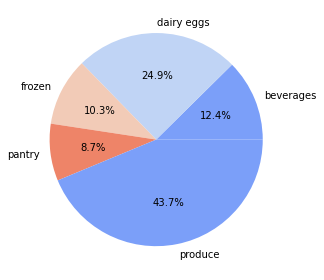

In [20]:
pie_department_name = ords_prods_cust_merged_5['department_name'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 4))
plt.tight_layout()
plt.ylabel('')

In [21]:
pie_department_name.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','pie_department_name.png'))

In [22]:
dept_name_age = pd.crosstab(ords_prods_cust_merged_5['department_name'], ords_prods_cust_merged_5['age_group'], dropna = False)

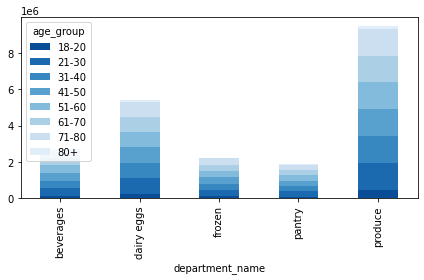

In [23]:
bar_dept_name_age = dept_name_age.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 8))
plt.legend(title = 'age_group', loc='upper left')
plt.tight_layout()

In [24]:
bar_dept_name_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_age.png'))

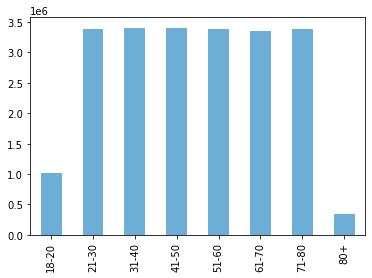

In [25]:
bar_age_group_orders = ords_prods_cust_merged_5['age_group'].value_counts().sort_index().plot.bar(color = sns.color_palette('Blues_r', 1))

In [26]:
bar_age_group_orders.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_group_orders.png'))

In [28]:
age_weekday = pd.crosstab(ords_prods_cust_merged_5['weekday'], ords_prods_cust_merged_5['age_group'], dropna = False)

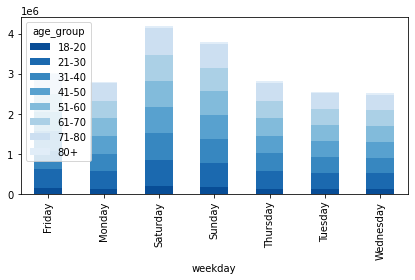

In [29]:
bar_age_weekday = age_weekday.plot.bar(stacked = True, color = sns.color_palette('Blues_r', 8))
plt.legend(title = 'age_group', loc='upper left')
plt.tight_layout()

In [30]:
bar_age_weekday.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','age_weekday.png'))

In [32]:
age_department = pd.crosstab(ords_prods_cust_merged_4['department_name'], ords_prods_cust_merged_4['age_group'], dropna = False)

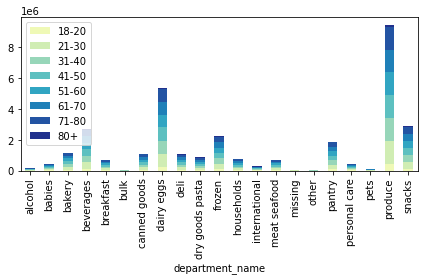

In [33]:
bar_age_department = age_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu', 8))
plt.legend(loc='upper left')
plt.tight_layout()

In [34]:
bar_age_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_department.png'))

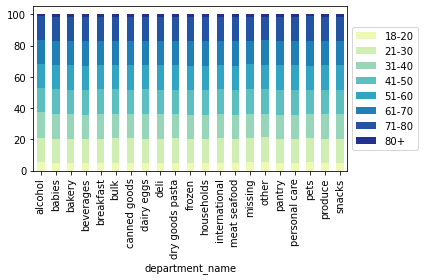

In [35]:
bar_age_department_100 = age_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('YlGnBu',8))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [36]:
bar_age_department_100.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_age_department_100.png'))

In [38]:
family_status_department = pd.crosstab(ords_prods_cust_merged_4['department_name'], ords_prods_cust_merged_4['marital_status'], dropna = False)

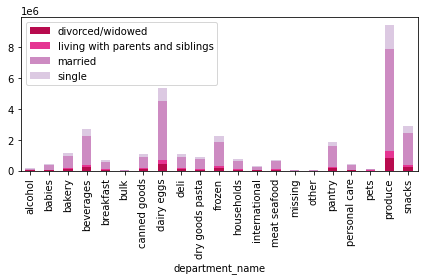

In [39]:
bar_family_status_department = family_status_department.sort_index().plot(kind = 'bar', stacked = True, color = sns.color_palette('PuRd_r', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [40]:
bar_family_status_department.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_department.png'))

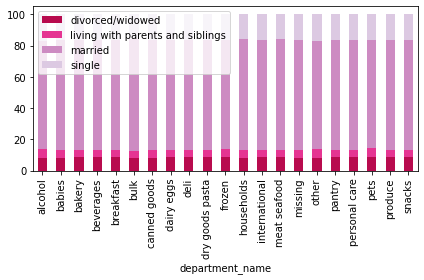

In [41]:
bar_family_status_department_100 = family_status_department.sort_index().apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('PuRd_r', 4))
plt.legend(loc='upper left')
plt.tight_layout()

In [42]:
bar_family_status_department_100.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','family_status_department_100.png'))

In [43]:
dept_name_income = pd.crosstab(ords_prods_cust_merged_5['department_name'], ords_prods_cust_merged_5['income_range'], dropna = False)

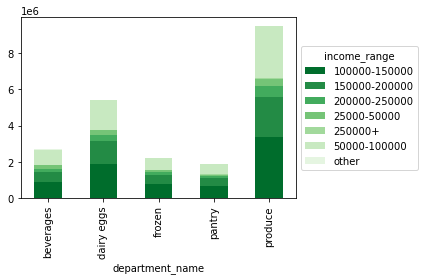

In [44]:
bar_dept_name_income = dept_name_income.plot.bar(stacked = True, color = sns.color_palette('Greens_r', 7))
plt.legend(title = 'income_range',loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [45]:
bar_dept_name_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_name_income.png'))

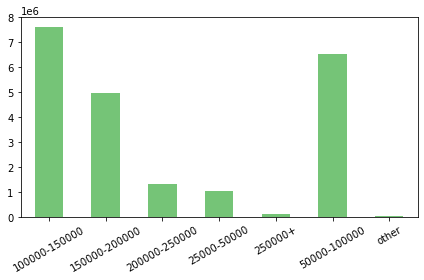

In [47]:
orders_income = ords_prods_cust_merged_5['income_range'].value_counts().sort_index().plot.bar(color = sns.color_palette('Greens_r', 1))
plt.xticks(rotation= 30, horizontalalignment="center")
plt.tight_layout()

In [48]:
orders_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_income.png'))

In [50]:
dept_name_dependants = pd.crosstab(ords_prods_cust_merged_5['department_name'], ords_prods_cust_merged_5['marital_status'], dropna = False)

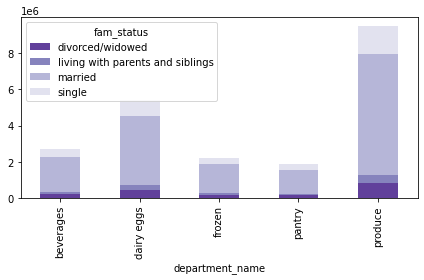

In [51]:
bar_dept_name_dependants = dept_name_dependants.plot.bar(stacked = True, color = sns.color_palette('Purples_r', 4))
plt.legend(title = 'fam_status',loc='upper left')
plt.tight_layout()

In [52]:
bar_dept_name_dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_dept_name_dependant.png'))

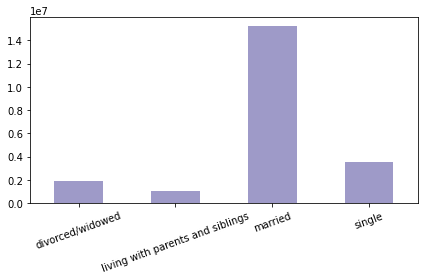

In [54]:
orders_family_status = ords_prods_cust_merged_5['marital_status'].value_counts().sort_index().plot.bar(color = sns.color_palette('Purples', 1))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [55]:
orders_family_status.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','orders_family_status.png'))

In [57]:
dept_name_dependants = pd.crosstab(ords_prods_cust_merged_5['department_name'], ords_prods_cust_merged_5['number_of_dependants'], dropna = False)

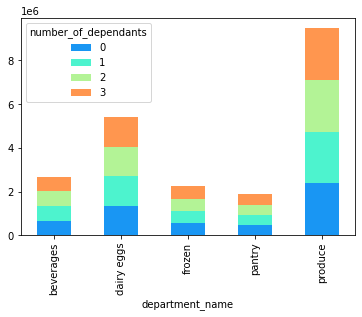

In [58]:
bar_dept_name_dependants = dept_name_dependants.plot.bar(stacked = True, color = sns.color_palette('rainbow', 4))
plt.legend(title = 'number_of_dependants',loc='upper left')

In [59]:
bar_dept_name_dependants.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_dependants.png'))

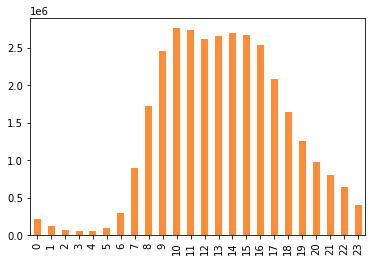

In [60]:
bar_busiest_hour = ords_prods_cust_merged_4['order_hour_of_day'].value_counts().sort_index().plot.bar(color = sns.color_palette('Oranges', 1))

In [61]:
bar_busiest_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_busiest_hour.png'))

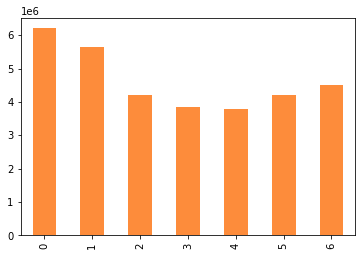

In [64]:
bar_busiest_day_of_week = ords_prods_cust_merged_4['order_dow'].value_counts().sort_index().plot.bar(color = sns.color_palette('Oranges', 1))

In [65]:
bar_busiest_day_of_week.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','busiest_day_of_week.png'))

In [66]:
prices_hour = ords_prods_cust_merged_4.groupby('order_hour_of_day').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

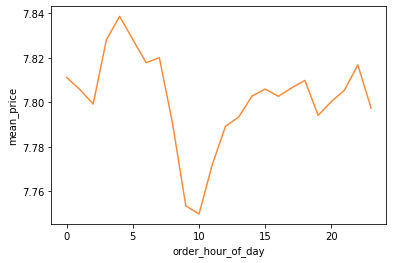

In [67]:
mean_price_line_chart_hour = prices_hour.plot.line(legend = False,color = sns.color_palette('Oranges',1))
plt.ylabel('mean_price')

In [68]:
mean_price_line_chart_hour.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','prices_hour.png'))

In [69]:
prices_weekday = ords_prods_cust_merged_4.groupby('weekday').agg({'prices': ['mean']})

Text(0, 0.5, 'mean_price')

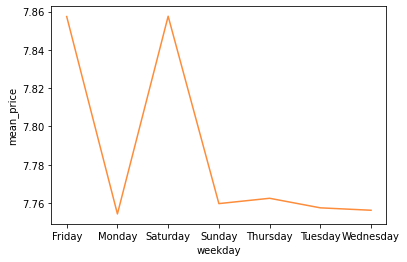

In [70]:
mean_price_line_chart_weekday = prices_weekday.plot.line(legend = False, color = sns.color_palette('Oranges', 1))
plt.ylabel('mean_price')

In [71]:
dept_name_part_day = pd.crosstab(ords_prods_cust_merged_5['department_name'], ords_prods_cust_merged_5['part_of_day'], dropna = False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'beverages'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'frozen'),
  Text(3, 0, 'pantry'),
  Text(4, 0, 'produce')])

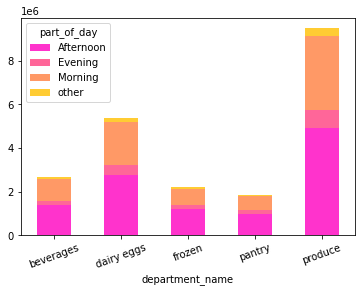

In [72]:
bar_dept_name_part_day = dept_name_part_day.plot.bar(stacked = True, color = sns.color_palette('spring', 4))
plt.legend(title = 'part_of_day',loc='upper left')
plt.xticks(rotation= 20, horizontalalignment="center")

In [73]:
bar_dept_name_part_day.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_part_day.png'))

In [74]:
dept_name_weekday = pd.crosstab(ords_prods_cust_merged_5['department_name'], ords_prods_cust_merged_5['weekday'], dropna = False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'beverages'),
  Text(1, 0, 'dairy eggs'),
  Text(2, 0, 'frozen'),
  Text(3, 0, 'pantry'),
  Text(4, 0, 'produce')])

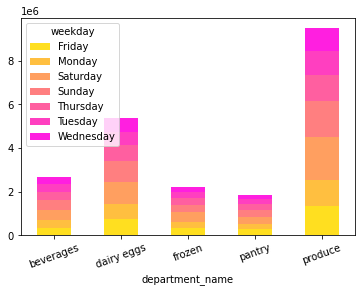

In [75]:
bar_dept_name_weekday = dept_name_weekday.plot.bar(stacked = True, color  = sns.color_palette('spring_r', 7))
plt.legend(title = 'weekday',loc='upper left')
plt.xticks(rotation= 20, horizontalalignment="center")

In [76]:
bar_dept_name_weekday.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','dept_name_weekday.png'))

In [77]:
dept_name_parental_status = pd.crosstab(ords_prods_cust_merged_5['department_name'], ords_prods_cust_merged_5['parental_status'], dropna = False)

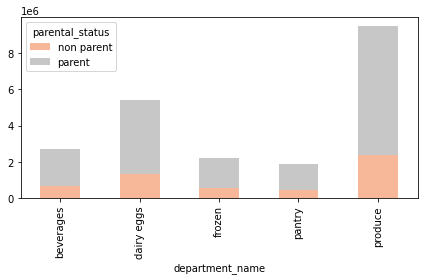

In [78]:
bar_dept_name_parental_status = dept_name_parental_status.plot.bar(stacked = True, color = sns.color_palette('RdGy', 2))
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [79]:
bar_dept_name_parental_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_name_parental_status.png'))

In [80]:
dept_name_parental_status_weekday = pd.crosstab(ords_prods_cust_merged_5['weekday'], ords_prods_cust_merged_5['parental_status'], dropna = False)

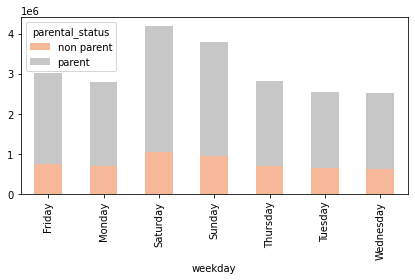

In [81]:
bar_dept_name_parental_status_weekday = dept_name_parental_status_weekday.plot.bar(stacked = True, color = sns.color_palette('RdGy', 2))
plt.legend(title = 'parental_status',loc='upper left')
plt.tight_layout()

In [82]:
bar_dept_name_parental_status_weekday.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_name_parental_status_weekday.png'))

In [83]:
age_spending = pd.crosstab(ords_prods_cust_merged_4['age_group'], ords_prods_cust_merged_4['spending_flag'], dropna = False)

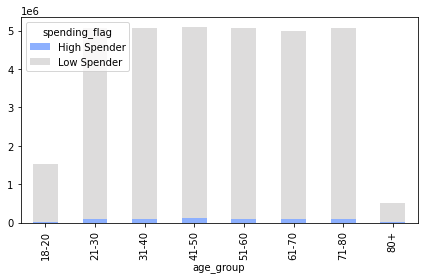

In [84]:
bar_age_spending = age_spending.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.legend(title = 'spending_flag',loc='upper left')
plt.tight_layout()

In [85]:
bar_age_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spending.png'))

In [87]:
number_of_dependants_spending_flag = pd.crosstab(ords_prods_cust_merged_4['number_of_dependants'], ords_prods_cust_merged_4['spending_flag'], dropna = False)

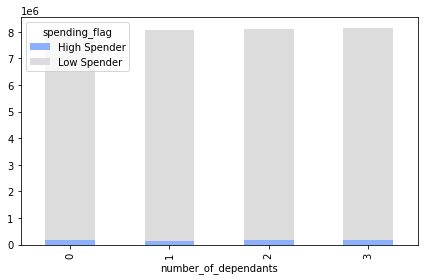

In [88]:
bar_number_of_dependants_spending_flag  = number_of_dependants_spending_flag .plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.legend(title = 'spending_flag',loc='upper left')
plt.tight_layout()

In [89]:
bar_number_of_dependants_spending_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'number_of_dependants_spending_flag.png'))

In [90]:
agg_age_price = ords_prods_cust_merged_4.groupby('age').agg({'prices' : ['min', 'mean', 'max']})

In [91]:
agg_age_price.to_clipboard()

In [92]:
agg_age_order_number = ords_prods_cust_merged_4.groupby('age').agg({'order_number' : ['min', 'mean', 'max']})

In [93]:
agg_age_order_number.to_clipboard()

In [94]:
agg_income_range_price = ords_prods_cust_merged_4.groupby('income_range').agg({'prices' : ['min', 'mean', 'max']})

In [95]:
agg_income_range_price.to_clipboard()

In [96]:
agg_income_range_order_number = ords_prods_cust_merged_4.groupby('income_range').agg({'order_number' : ['min', 'mean', 'max']})

In [97]:
agg_income_range_order_number.to_clipboard()

In [99]:
agg_fam_status_price = ords_prods_cust_merged_4.groupby('marital_status').agg({'prices' : ['min', 'mean', 'max']})

In [100]:
agg_fam_status_price.to_clipboard()

In [101]:
agg_fam_status_order_number = ords_prods_cust_merged_4.groupby('marital_status').agg({'order_number' : ['min', 'mean', 'max']})

In [102]:
agg_fam_status_order_number.to_clipboard()

In [103]:
agg_number_of_dependants_price = ords_prods_cust_merged_4.groupby('number_of_dependants').agg({'prices' : ['min', 'mean', 'max']})

In [104]:
agg_number_of_dependants_price.to_clipboard()

In [105]:
agg_number_of_dependants_order_number = ords_prods_cust_merged_4.groupby('number_of_dependants').agg({'order_number' : ['min', 'mean', 'max']})

In [106]:
agg_number_of_dependants_order_number.to_clipboard()

In [107]:
agg_parental_status_price = ords_prods_cust_merged_4.groupby('parental_status').agg({'prices' : ['min', 'mean', 'max']})

In [109]:
agg_parental_status_order_number = ords_prods_cust_merged_4.groupby('parental_status').agg({'order_number' : ['min', 'mean', 'max']})

In [110]:
agg_parental_status_order_number.to_clipboard()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

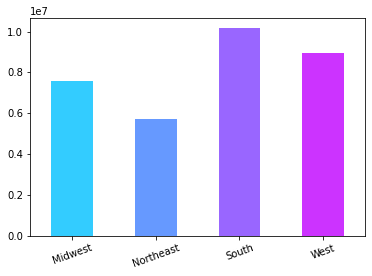

In [111]:
region_bar = ords_prods_cust_merged_4['region'].value_counts().sort_index().plot.bar(color = sns.color_palette('cool', 4))
plt.xticks(rotation= 20, horizontalalignment="center")

In [112]:
region_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_bar.png'))

In [113]:
department_region = pd.crosstab(ords_prods_cust_merged_4['department_name'], ords_prods_cust_merged_4['region'], dropna = False)

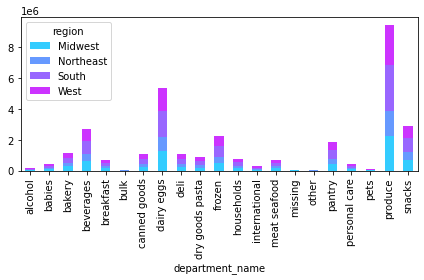

In [114]:
bar_department_region = department_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

In [115]:
bar_department_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_region.png'))

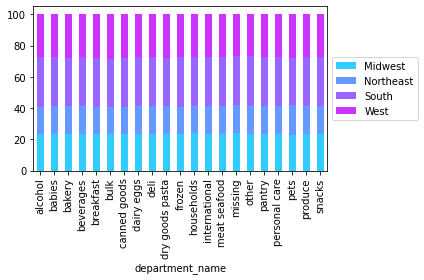

In [116]:
bar_department_region_100 = department_region .apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [117]:
bar_department_region_100.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_region_100.png'))

In [118]:
age_region = pd.crosstab(ords_prods_cust_merged_4['age_group'], ords_prods_cust_merged_4['region'], dropna = False)

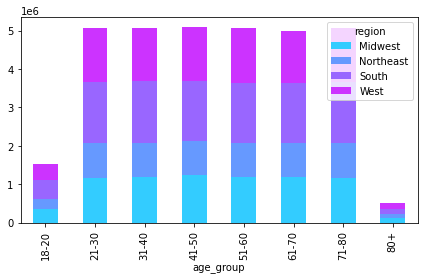

In [119]:
bar_age_region = age_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

In [120]:
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_region.png'))

In [121]:
income_region = pd.crosstab(ords_prods_cust_merged_4['income_range'], ords_prods_cust_merged_4['region'], dropna = False)

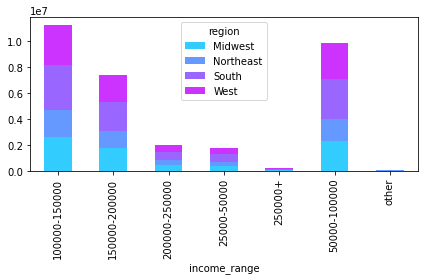

In [122]:
bar_income_region = income_region.plot(kind = 'bar', stacked = True, color = sns.color_palette('cool', 4))
plt.tight_layout()

In [123]:
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_region.png'))

Text(0, 0.5, '')

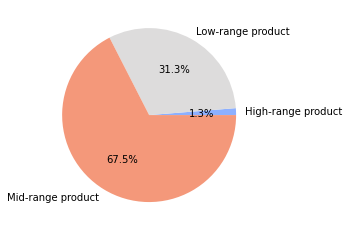

In [125]:
pie_time_product_price = ords_prods_cust_merged_4['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm', 3))
plt.ylabel('')

In [126]:
pie_time_product_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_time_product_price.png'))

In [127]:
departments_price_range = pd.crosstab(ords_prods_cust_merged_5['department_name'], ords_prods_cust_merged_5['price_range_loc'], dropna = False)

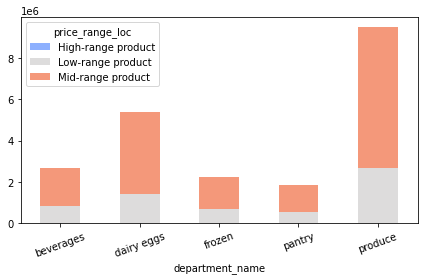

In [128]:
bar_departments_price_range = departments_price_range.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [129]:
bar_departments_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments_price_range.png'))

In [131]:
spending_flag_price_range = pd.crosstab(ords_prods_cust_merged_5['spending_flag'], ords_prods_cust_merged_5['price_range_loc'], dropna = False)

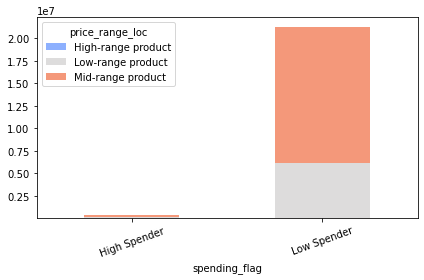

In [132]:
spending_flag_price_range = spending_flag_price_range.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [133]:
spending_flag_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_flag_price_range.png'))

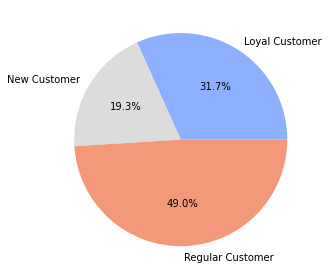

In [134]:
loyalty_pie = ords_prods_cust_merged_4['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('coolwarm',3))
plt.ylabel('')
plt.tight_layout()

In [135]:
loyalty_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_pie.png'))

In [136]:
frequency_flag_loyalty_status = pd.crosstab(ords_prods_cust_merged_4['frequency_flag'], ords_prods_cust_merged_4['loyalty_flag'], dropna = False)

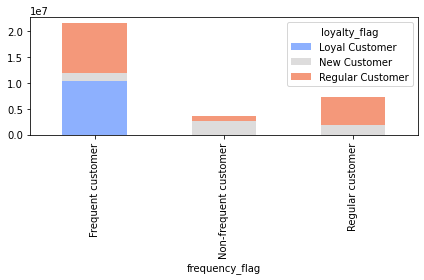

In [137]:
bar_frequency_flag_loyalty_status = frequency_flag_loyalty_status.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm',3))
plt.tight_layout()

In [138]:
bar_frequency_flag_loyalty_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frequency_flag_loyalty_status.png'))

In [139]:
ords_prods_cust_merged_4.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_8.pkl'))

In [140]:
df_top_25_selling_items = ords_prods_cust_merged_4[ords_prods_cust_merged_4['selling_performance']=='Top 25 selling product']

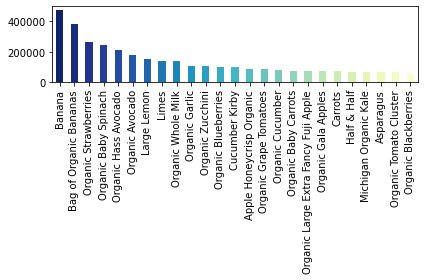

In [141]:
bar_top_25_selling_items = df_top_25_selling_items['product_name'].value_counts().plot.bar(color = sns.color_palette('YlGnBu_r', 25))
plt.tight_layout()

In [142]:
gender_order_number = pd.crosstab(ords_prods_cust_merged_4['gender'], ords_prods_cust_merged_4['frequency_flag'], dropna = False)

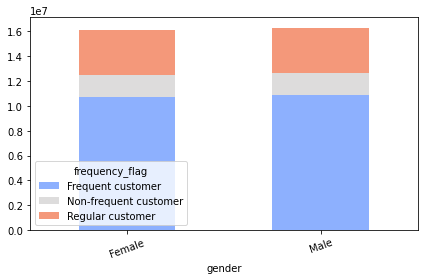

In [143]:
bar_gender_order_number = gender_order_number.plot(kind = 'bar', stacked = True, color = sns.color_palette('coolwarm', 3))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [144]:
bar_gender_order_number.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_gender_order_number .png'))

In [145]:
bar_top_25_selling_items.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','top_25_selling_items.png'))

In [146]:
ords_prods_cust_merged_5.to_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_8.pkl'))